## Programming Assignment 1 : Linear Regression

This solution notebook is divided into three parts. 
    
    Part Zero : Defining functions 
    Part One : Univariate Linear Regression
    Part Two : Multivariate Linear Regression


### Part Zero: Defining functions
Our task is to design functions -
* PlotData(x,y) : To plot the population(y) vs profits(x)
* hypothesis(TraingEg, theta)      : For returning the hypothesis function 
* ComputeCost(x, y, theta)  : For getting the value of cost function for given training example, output, and theta
* GradientDescent(x, y, theta, alpha, num_iters) : This function executes the gradient descent for given x, y learning rate(alpha), and number of iterations (num_iters), returns the value of theta. It also plots the costfunction vs number of iteration graph
* FeatureNoramalize(x) : For standardizing the features of training examples.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
#loading the data
def PlotData(x, y):
    """
    Plots y vs x
    """
    plt.style.use('default')
    fig, ax = plt.subplots()
    ax.plot(x[:,1],y, 'x', markersize = 10)
    ax.set_title("Profits Vs. Population")
    ax.set_xlabel("Population of city in 10,000s")
    ax.set_ylabel("Profit in $10,000")
    ax.set_xlim([np.min(x)-5, np.max(x)+5])
    ax.set_ylim([np.min(y)-5, np.max(y)+5])
    plt.grid()
    plt.show()

In [3]:
def hypothesis(x, theta):
    """
    Returns the hypothesis column vector h(theta) 
    """
    h_theta = x@theta
    return h_theta

In [4]:
def ComputeCost(x, y, theta):
    """
    Computes the value of cost function for given x,y, and theta
    """
    h = hypothesis(x, theta)
    J_cost = np.sum((h - y)**2)/(2*x.shape[0])
    return J_cost


In [5]:
def GradientDescent(x, y, theta, alpha, num_iters):
    """
    For implementing Gradient Descent
    returns updated theta.
    """
    m = x.shape[0]
    J_costfunc = np.empty(num_iters) 
    del_J = np.empty(shape = theta.shape)#
    for i in range(num_iters):
        h = hypothesis(x, theta)
        del_J =  1/m * np.sum(np.multiply(h-y, x), axis = 0).reshape(-1,1)      
        theta = theta -  alpha*(1/m)*np.sum(np.multiply(h-y, x), axis = 0).reshape(-1,1)
        J_costfunc[i] = ComputeCost(x,y,theta)
    J_costfunc = J_costfunc.reshape(-1,1)  

    return  J_costfunc, theta    

In [6]:
def NormalEq (x , y):
    theta = np.linalg.inv(x.T@x)@(x.T@y)
    return theta

In [7]:
def FeatureNormalize(x):
    """
    Standardizes the features, returns the matrix 'x'
    """
    mu = np.mean(x, axis = 0)
    std = np.std(x,axis = 0)
    for i in range(1,x.shape[1]):
        x[:,i] = (x[:,i] - np.mean(x[:,i]))/np.std(x[:,i])
    return x, mu, std

### Part 1 : Univariate Linear Regression


Our task is to 
1. Load the data "ex1data1.txt" and plot the graph for profits vs population, using the PlotData function.

2. Predict the cost and the hypothesis parameters for linear regression model, by implementing gradient descent, and compare them with expected values.

3. Produce surface plot of cost function vs. the hypothesis parameters(theta), and plot cost function vs. number of iterations.


In [8]:
#loading the data
data = np.loadtxt("ex1data1.txt", delimiter = ",")
x = data[:,0].reshape(-1,1) 
y = data[:,1].reshape(-1,1)
x = np.hstack((np.ones(x.shape[0]).reshape(-1,1), x)) # for concating the zeroth feature

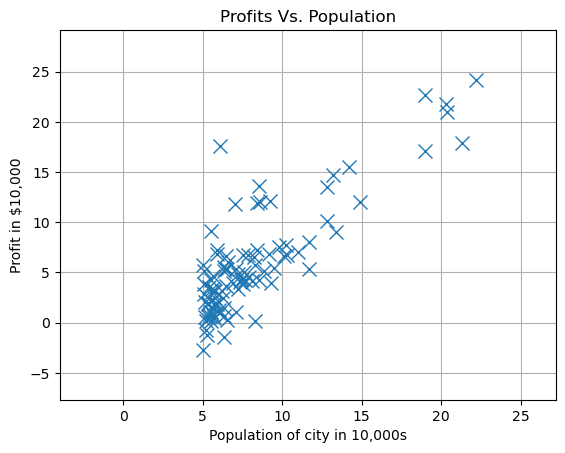

In [9]:
PlotData(x,y)

In [10]:
#givens
iterations = 1500 
alpha = 0.01 
theta = np.zeros(x.shape[1]).reshape(-1,1) #initial theta
theta1 = np.array([[-1],[2]])  #test theta

#finding the costs
J = ComputeCost(x,y,theta)
J1 = ComputeCost(x,y,theta1)

#implementing the gradient descent
cost, theta = GradientDescent(x,y,theta,alpha,iterations)

print('With theta = [0 ; 0]\nCost computed = {0:0.4f}\nCost Expected = 32.07\n'.format(J))
print('With theta = [-1 : 2]\nCost computed = {0:0.4f}\nCost Expected = 54.24'.format(J1))
print("Theta found by Gradient Descent: {}\nExpected theta: {}".format(theta.reshape(-1), np.array([-3.603,1.1664])))

With theta = [0 ; 0]
Cost computed = 32.0727
Cost Expected = 32.07

With theta = [-1 : 2]
Cost computed = 54.2425
Cost Expected = 54.24
Theta found by Gradient Descent: [-3.63029144  1.16636235]
Expected theta: [-3.603   1.1664]


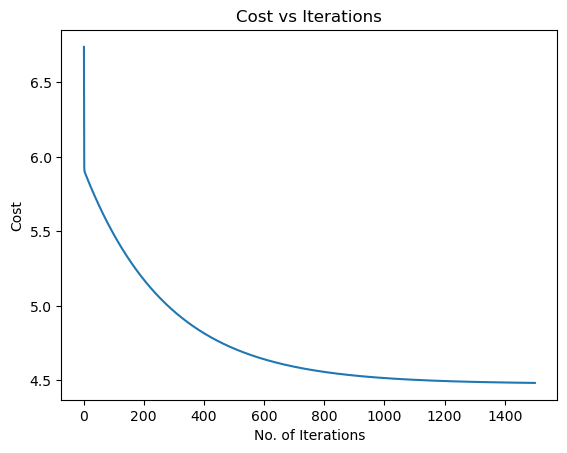

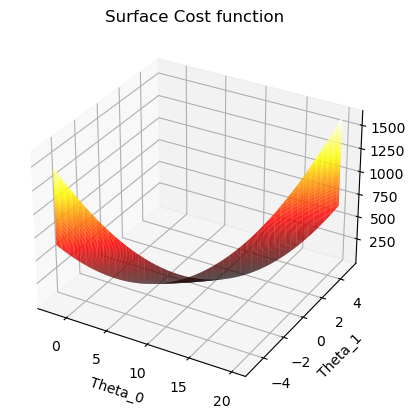

In [11]:
#plotting Cost vs number of iterations 
iters = np.linspace(1,iterations,iterations).reshape(-1,1)
plt.plot(iters,cost)
plt.xlabel("No. of Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations")
plt.show()
print("\n\n")


#plotting the surface cost vs theta parameters:
thet0 = np.linspace(-2,20,100)
thet1 = np.linspace(-5,5,100)
J = np.empty([100,100])

for i,th0 in enumerate(thet0):
    for j, th1 in enumerate(thet1):
        thets = np.array([th0,th1]).reshape(-1,1)
        J[i,j] = ComputeCost(x,y,thets)

ax = plt.axes(projection = '3d')
ax.plot_surface(thet0,thet1, J, cmap = 'hot')
ax.set_title("Surface Cost function")
ax.set_xlabel("Theta_0")
ax.set_ylabel("Theta_1")
plt.show()

### Part 2 : Multivariate Linear Regression
Here, we have to:

1. Load the data "ex1data2.txt" and print the first 10 values. 
2. Standardize the training examples.
3. Predict the price by deriving the LR hypothesis through gradi



In [12]:
#loading data
data = np.loadtxt('ex1data2.txt', delimiter = ",")
x = data[:, 0:2]
y = data[:,2].reshape(-1,1)

#first ten examples from the data
print("Index\tFeat.1\tFeat.2\tLabel")
index = range(10)
for i,a,b,c in zip(index,x[:10,0],x[:10,1], y[:10,0]):
    print("{}\t{}\t{}\t{}".format(i,a,b,c))

x = np.hstack((np.ones(x.shape[0]).reshape(-1,1), x)) #for concating the zeroth feature


Index	Feat.1	Feat.2	Label
0	2104.0	3.0	399900.0
1	1600.0	3.0	329900.0
2	2400.0	3.0	369000.0
3	1416.0	2.0	232000.0
4	3000.0	4.0	539900.0
5	1985.0	4.0	299900.0
6	1534.0	3.0	314900.0
7	1427.0	3.0	198999.0
8	1380.0	3.0	212000.0
9	1494.0	3.0	242500.0


In [13]:
# Normalizing the features
x,mu,std = FeatureNormalize(x)    

In [14]:
# givens
theta = np.zeros(x.shape[1]).reshape(-1,1)
alpha = 0.01
iterations = 400

# applying gradient descent
cost, theta = GradientDescent(x,y,theta,alpha,iterations)

In [15]:
# Estimate the price of a 1650 sq-ft (feature 1) , 3 br (feature 2) house
 
x1 = np.array([1650, 3])
x1 = np.array([(x1[0] - mu[1])/std[1] , (x1[1] - mu[2])/std[2] ]).reshape(1,-1)
x1 = np.hstack((np.ones(1).reshape(1,-1), x1))

#using gradient descent
Price_gd = hypothesis(x1,theta)

#using Normal Equation
theta = NormalEq(x,y)
Price_ne = hypothesis(x1,theta)

print("The price for a house of size 1650 sqft. having 3 bedrooms predicted\nUsing gradient descent : ${0:0.4f}\nUsing normal equation: ${0:0.4f}".format(Price_gd[0][0], Price_ne[0][0]))

The price for a house of size 1650 sqft. having 3 bedrooms predicted
Using gradient descent : $289221.5474
Using normal equation: $289221.5474
